In [1]:
from src.cnc import CNC, simulate_from_distribution
from src.utils import * #, qutip_simuation
from src.vertex_decomposition import find_vertex_decomposition, find_cnc_vertex_decomposition
import matplotlib.pyplot as plt
from src.sim_examples import *

In [2]:
# Load data:
from src.utils import load_all_maximal_cncs_matrix
all_cncs_2 = load_all_maximal_cncs_matrix(2)
all_cncs_3 = load_all_maximal_cncs_matrix(3)

# Example 1: Computing a Boolean function

## Quantum circuit via Qiskit:

Quantum circuit for inputs (0,0)
     ┌───┐   ┌─────┐ ┌───┐ ┌─┐           
q_0: ┤ H ├─■─┤ Sdg ├─┤ H ├─┤M├───────────
     ├───┤ │ └─────┘ ├───┤ └╥┘┌─┐        
q_1: ┤ H ├─■────■────┤ H ├──╫─┤M├────────
     ├───┤      │   ┌┴───┴┐ ║ └╥┘┌───┐┌─┐
q_2: ┤ H ├──────■───┤ Sdg ├─╫──╫─┤ H ├┤M├
     └───┘          └─────┘ ║  ║ └───┘└╥┘
c: 3/═══════════════════════╩══╩═══════╩═
                            0  1       2  

Quantum circuit for inputs (0,1)
     ┌───┐   ┌─────┐ ┌───┐ ┌─┐        
q_0: ┤ H ├─■─┤ Sdg ├─┤ H ├─┤M├────────
     ├───┤ │ └─────┘┌┴───┴┐└╥┘┌───┐┌─┐
q_1: ┤ H ├─■────■───┤ Sdg ├─╫─┤ H ├┤M├
     ├───┤      │   └─┬─┬─┘ ║ └───┘└╥┘
q_2: ┤ H ├──────■─────┤M├───╫───────╫─
     └───┘            └╥┘   ║       ║ 
c: 3/══════════════════╩════╩═══════╩═
                       2    0       1  

Quantum circuit for inputs (1,0)
     ┌───┐      ┌─┐        
q_0: ┤ H ├─■────┤M├────────
     ├───┤ │    └╥┘┌───┐┌─┐
q_1: ┤ H ├─■──■──╫─┤ H ├┤M├
     ├───┤    │  ║ └┬─┬┘└╥┘
q_2: ┤ H ├────■──╫──┤M├──╫─


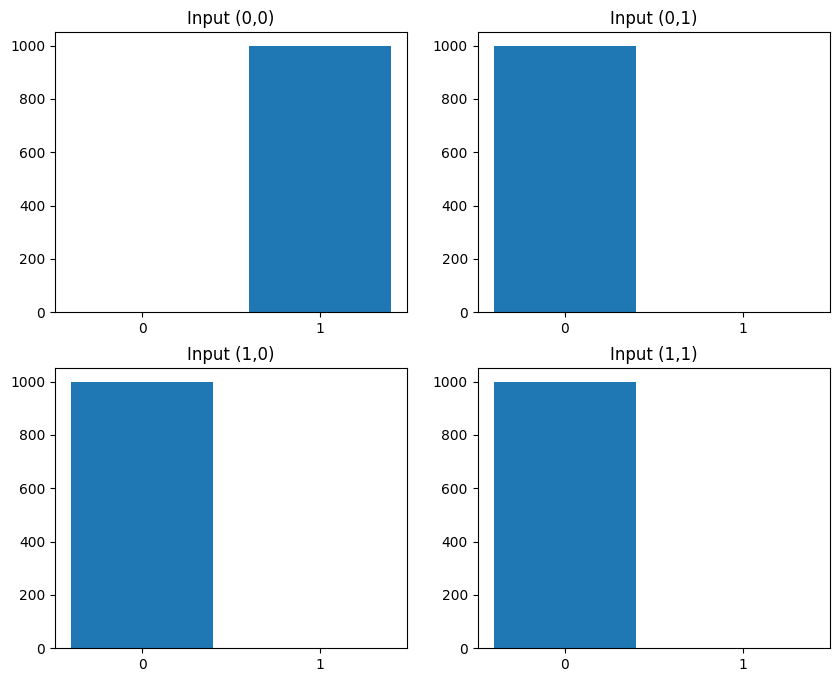

In [19]:
qc_boolean = qc_boolean_function()

## CNC-based Magic Simulation

In our case here the input state is a stabilizer state, which is a special kind of CNC operator. This makes the initial distribution of CNC operators quite simple, i.e. there is a unique operator that we sample from. In our case this initial state is (up to local Clifford gates) equivalent to the well-known Greenberger-Horne-Zeilinger (GHZ) state. 

In [3]:
GHZ_CNC = CNC({
    Pauli("III"): 0,
    Pauli("XZI"): 0,
    Pauli("IZX"): 0,
    Pauli("ZXZ"): 0,
    Pauli("YYZ"): 0,
    Pauli("ZYY"): 0,
    Pauli("XIX"): 0,
    Pauli("YXY"): 1
})
GHZ = GHZ_CNC.get_pauli_basis_representation()
initial_distribution = {GHZ_CNC: 1}

In [39]:
measurements = [
    [Pauli("YII"),Pauli("IXI"),Pauli("IIY")],
    [Pauli("YII"),Pauli("IYI"),Pauli("IIZ")],
    [Pauli("ZII"),Pauli("IXI"),Pauli("IIZ")],
    [Pauli("ZII"),Pauli("IYI"),Pauli("IIY")]
]

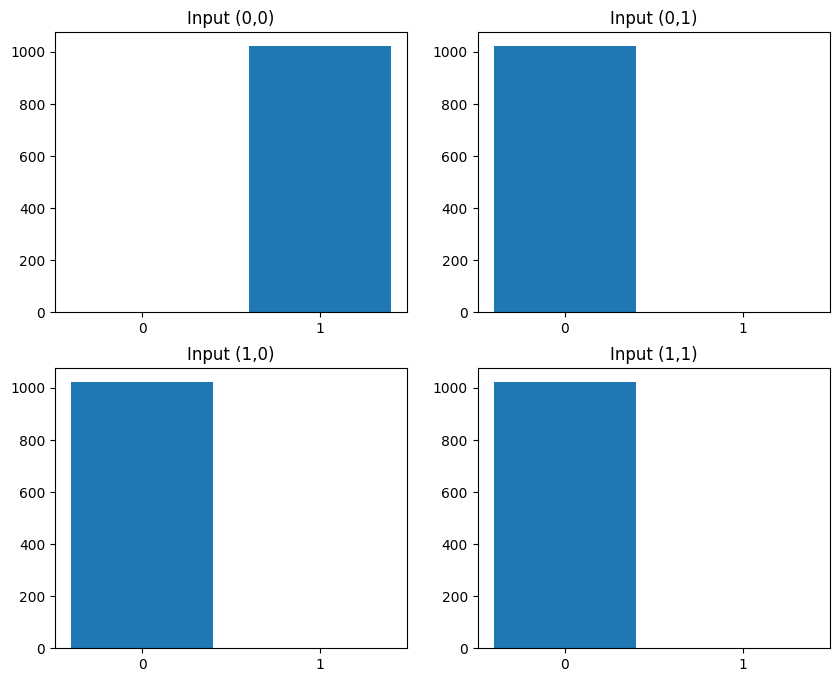

In [22]:
# Initialize simulation:
shots = 1024
magic_sim_boolean = magic_sim_boolean_function(initial_distribution,measurements,shots)

## CNC-based Magic Simulation

In general, stabilizer states can also be written as a probabilistic mixture of just two CNC operators. In this way the CNC-based approach goes beyond stabilizer circuits.

In [24]:
CNC1 = CNC({
    Pauli("III"): 0,
    Pauli("XZI"): 0,
    Pauli("ZXZ"): 0,
    Pauli("YYZ"): 0,
    Pauli("IZX"): 0,
    Pauli("ZYY"): 0,
    Pauli("XIX"): 0,
    Pauli("YXY"): 1,
    Pauli("IIZ"): 0,
    Pauli("XZZ"): 0,
    Pauli("ZXI"): 0,
    Pauli("YYI"): 0,
    Pauli("IZY"): 0,
    Pauli("XIY"): 0,
    Pauli("ZYX"): 1,
    Pauli("YXX"): 0,
})
CNC2 = CNC({
    Pauli("III"): 0,
    Pauli("XZI"): 0,
    Pauli("ZXZ"): 0,
    Pauli("YYZ"): 0,
    Pauli("IZX"): 0,
    Pauli("ZYY"): 0,
    Pauli("XIX"): 0,
    Pauli("YXY"): 1,
    Pauli("IIZ"): 1,
    Pauli("XZZ"): 1,
    Pauli("ZXI"): 1,
    Pauli("YYI"): 1,
    Pauli("IZY"): 1,
    Pauli("XIY"): 1,
    Pauli("ZYX"): 0,
    Pauli("YXX"): 1,
})
initial_distribution = {CNC1: 0.5, CNC2:0.5}

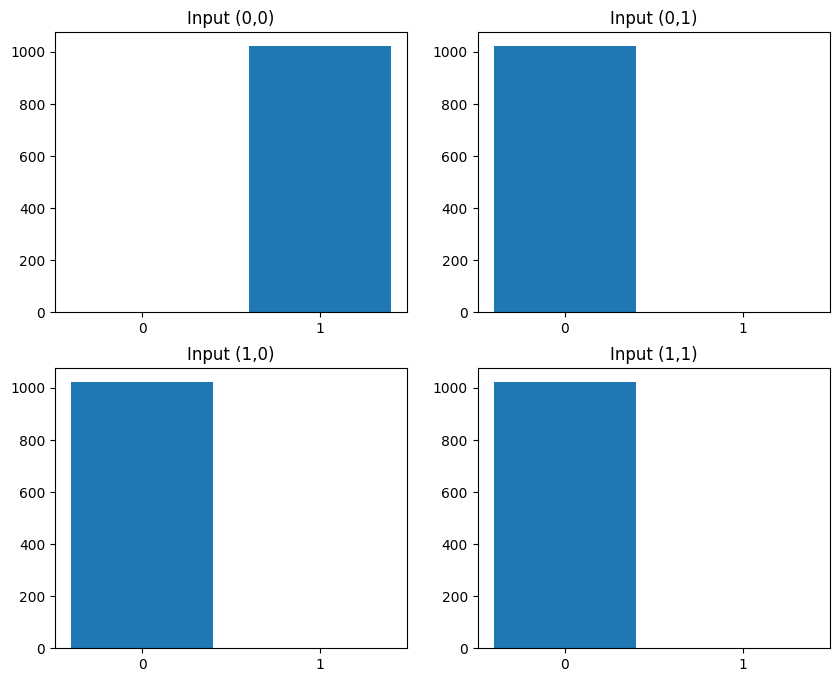

In [25]:
# Initialize simulation:
shots = 1024
magic_sim_boolean = magic_sim_boolean_function(initial_distribution,measurements,shots)

# Example 2:

## Quantum Circuit:

     ┌───┐┌────────┐┌───┐┌─┐
  q: ┤ H ├┤ P(π/4) ├┤ H ├┤M├
     └───┘└────────┘└───┘└╥┘
c: 1/═════════════════════╩═
                          0 


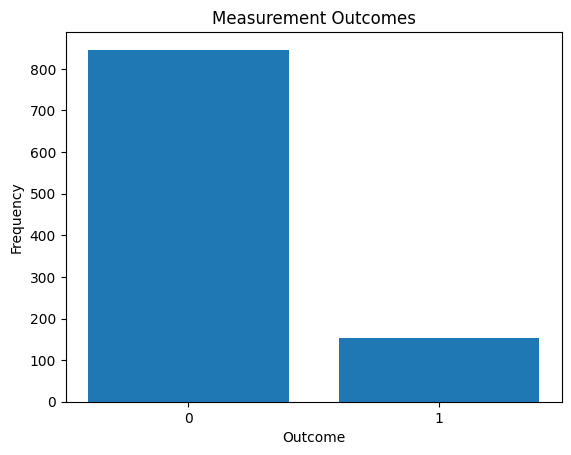

In [8]:
qc_HTH()

## Magic state injection

     ┌───┐                   ┌────────┐┌───┐┌─┐
q_0: ┤ H ├────────────■──────┤ P(π/2) ├┤ H ├┤M├
     ├───┤┌────────┐┌─┴─┐┌─┐ └───╥────┘└───┘└╥┘
q_1: ┤ H ├┤ P(π/4) ├┤ X ├┤M├─────╫───────────╫─
     └───┘└────────┘└───┘└╥┘┌────╨────┐      ║ 
c: 1/═════════════════════╩═╡ c_0=0x1 ╞══════╩═
                          0 └─────────┘      0 


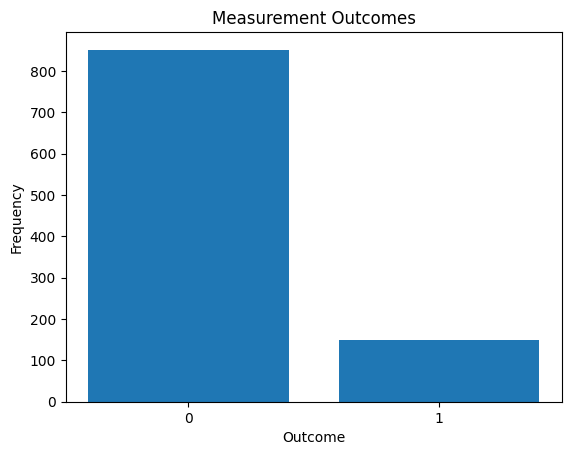

In [9]:
qc = qc_magic_HTH()

## Pauli-based computation

Following Bravyi, Smith, and Smolin, this circuit can in turn be simulated using a Pauli-based computation (PBC). In particular, the PBC scheme reduces the MSI circuit above with two qubits to a measurement-based computation on a single $T$-state $\left | T \right \rangle = (|0\rangle +e^{i\pi/4}|1\rangle)/\sqrt{2}$. To simulate the circuit above we first generate a random classical bit $s$ such that if $s=0$ measure $X$, otherwise measure $Y$. The quantum circuit accomplishing this is shown below.

     ┌───┐┌────────┐┌───┐┌─┐
  q: ┤ H ├┤ P(π/4) ├┤ H ├┤M├
     └───┘└────────┘└───┘└╥┘
c: 1/═════════════════════╩═
                          0 


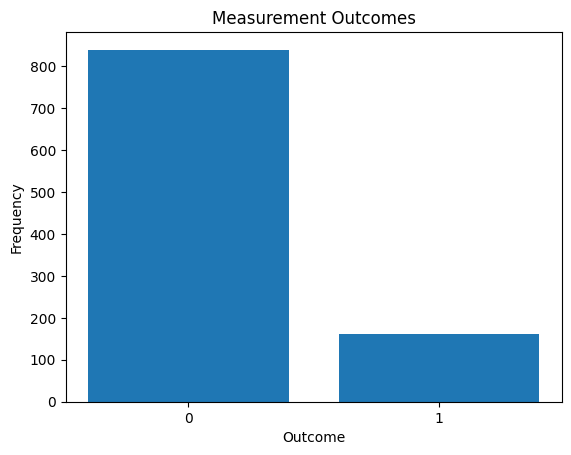

In [10]:
qc_pbc = qc_HTH_PBC()

## CNC-based Magic Simulation

Using the same measurement sequence as above we can also simulate this circuit using our sampling-based Magic Simulation.

In [2]:
# Define T state:
r = 1/np.sqrt(2)
T = np.array([1,r,0,r])

In [3]:
# Single qubit cnc operators
A000 = np.array([1,1,1,1])
A010 = np.array([1,1,-1,1])
A101 = np.array([1,-1,1,-1])

In [4]:
CNC1 = CNC({
    Pauli("I"): 0,
    Pauli("X"): 0,
    Pauli("Y"): 0,
    Pauli("Z"): 0
})
CNC2 = CNC({
    Pauli("I"): 0,
    Pauli("X"): 0,
    Pauli("Y"): 1,
    Pauli("Z"): 0
})
CNC3 = CNC({
    Pauli("I"): 0,
    Pauli("X"): 1,
    Pauli("Y"): 0,
    Pauli("Z"): 1
})

In [5]:
# Decomposition of T-state:
T_prime = (1/2)*(r*A000+A010+(1-r)*A101)
# Check that this works:
set(T) == set(T_prime)

True

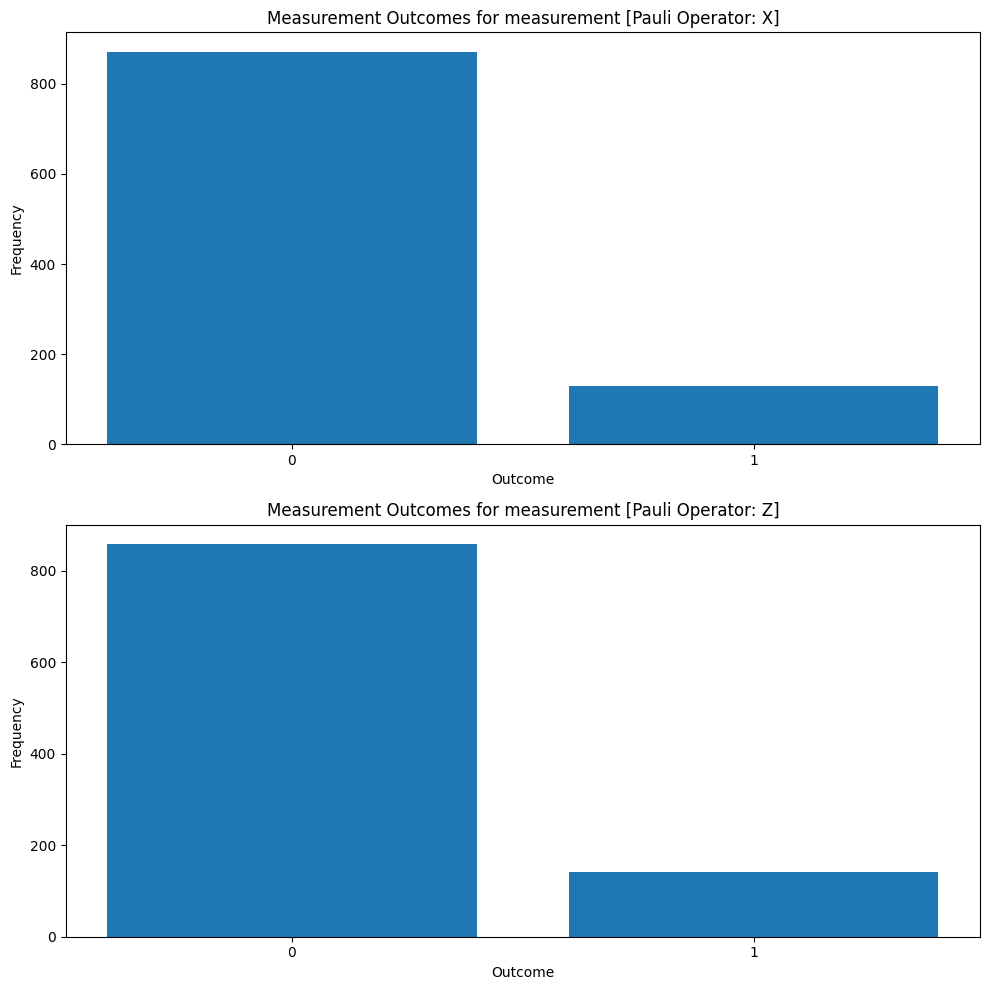

[{'0': 871, '1': 129}, {'0': 858, '1': 142}]

In [8]:
# Initialize simulation:
initial_distribution = {(CNC1): r/2, CNC2: 0.5, CNC3: (1-r)/2}
measurements = [[Pauli('X')],[Pauli('Z')]]
shots = 1000
magic_sim_HTH(initial_distribution,measurements,shots)